In [1]:
# Sample API
import mae6225
import simulation
import numpy
mae6225.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

Re   = 1.0
dt   = 0.001
tmax = 2.

# Define cell-centered variable names
center_vars = ['pres', 'divp', 'divc','asol','eror']
face_vars   = ['velc', 'hvar','asol','eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = mae6225.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = mae6225.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = mae6225.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)
simulation.update_bc_val(0.0, gridx, gridy, 'velc')

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

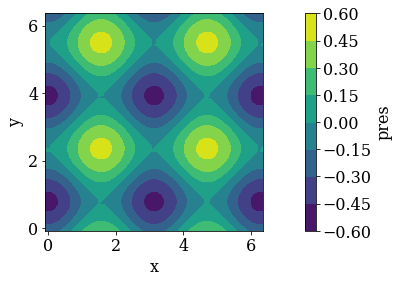

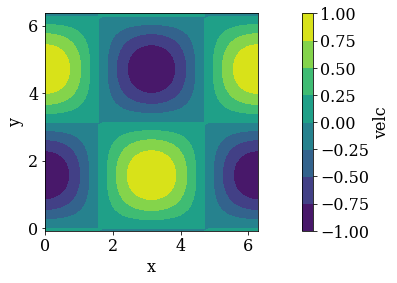

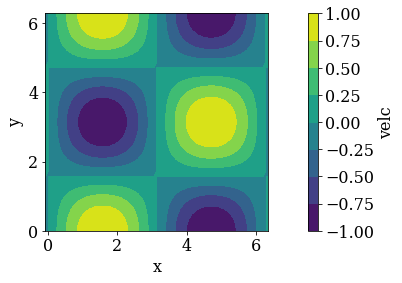

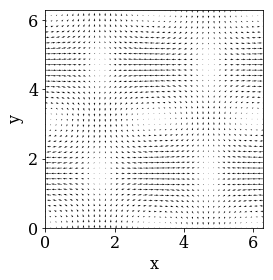

In [4]:
mae6225.io.plot_contour(gridc, 'pres')
mae6225.io.plot_contour(gridx, 'velc')
mae6225.io.plot_contour(gridy, 'velc')
mae6225.io.plot_vector(gridx, gridy, 'velc')

In [5]:
t  = 0.0
nt = 0

ins_stats = dict()

while t <= tmax:
    
    # Calculate predicted velocity: u* = dt*H(u^n)
    mae6225.ins.predictor(gridx, gridy, 'velc', 'hvar', Re, dt)
    
    # Calculate RHS for the pressure Poission solver div(u)/dt
    mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divp', ifac=dt)
    
    # Solve the pressure Poisson equation 
    ins_stats['ites'], ins_stats['res'] = mae6225.poisson.solve_jacobi(gridc, 'pres', 'divp',
                                                                       maxiter=10000, tol=1e-9)
    
    # Calculate corrected velocity u^n+1 = u* - dt * grad(P) 
    mae6225.ins.corrector(gridc, gridx, gridy, 'velc', 'pres', dt)
    
    # Calculate divergence of the corrected velocity to display stats
    mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divc')
    
    # Calculate stats
    ins_stats.update(mae6225.ins.stats(gridc, gridx, gridy, 'velc', 'pres', 'divc'))
    
    # Display stats
    if nt % 10 == 0:
        mae6225.io.display_stats(t, ins_stats)   
    
    t += dt
    nt += 1
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(t, gridx, gridy, 'velc')

------------ Time = 0.0 ---------------
Number of poisson iterations    : 7417
Final poisson residual : 9.995717327433399e-10
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.2310273322720395, -1.7157888684317026
Max, Min, DIV : 2.2339514266223048e-10, -2.2339513572333658e-10


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 1732
Final poisson residual : 9.975430803487872e-10
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 0.7099734589585399, -0.2836874699995237
Max, Min, DIV : 3.0737984900441884e-10, -3.0730819711860535e-10


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 1659
Final poisson residual : 9.998899936347639e-10
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P

------------ Time = 0.22000000000000017 ---------------
Number of poisson iterations    : 1047
Final poisson residual : 9.97704557930799e-10
Max, Min, U   : 0.6420510717332313, -0.6420510717332312
Max, Min, V   : 0.6420510717332312, -0.6420510717332313
Max, Min, P   : 0.3180967291168796, -0.20832805173108354
Max, Min, DIV : 3.0715058296250375e-10, -3.0732308364811445e-10


------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : 1061
Final poisson residual : 9.994707182821963e-10
Max, Min, U   : 0.6293376087080936, -0.6293376087080935
Max, Min, V   : 0.6293376087080935, -0.6293376087080936
Max, Min, P   : 0.30556168792660227, -0.2011169391154639
Max, Min, DIV : 3.07492050918845e-10, -3.0800107256312437e-10


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 1072
Final poisson residual : 9.991809110842964e-10
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.616875889117

------------ Time = 0.44000000000000034 ---------------
Number of poisson iterations    : 988
Final poisson residual : 9.975482167583434e-10
Max, Min, U   : 0.41350427439166537, -0.4135042743916653
Max, Min, V   : 0.4135042743916653, -0.41350427439166537
Max, Min, P   : 0.1304331340972455, -0.09185763549204097
Max, Min, DIV : 3.0169540173388687e-10, -3.1030136446452694e-10


------------ Time = 0.45000000000000034 ---------------
Number of poisson iterations    : 977
Final poisson residual : 9.979624546735414e-10
Max, Min, U   : 0.4053163411653829, -0.40531634116538284
Max, Min, V   : 0.40531634116538284, -0.4053163411653829
Max, Min, P   : 0.1252438361137806, -0.08828589479050533
Max, Min, DIV : 3.0134602658268145e-10, -3.1063287098814785e-10


------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : 966
Final poisson residual : 9.974117584086374e-10
Max, Min, U   : 0.3972905398798565, -0.3972905398798565
Max, Min, V   : 0.3972905398798565, -0.39729053

------------ Time = 0.6600000000000005 ---------------
Number of poisson iterations    : 708
Final poisson residual : 9.990275799805813e-10
Max, Min, U   : 0.26631181298178935, -0.2663118129817893
Max, Min, V   : 0.2663118129817893, -0.26631181298178935
Max, Min, P   : 0.05351120701365613, -0.037463874908327054
Max, Min, DIV : 2.77039057059586e-10, -3.1644217628190585e-10


------------ Time = 0.6700000000000005 ---------------
Number of poisson iterations    : 695
Final poisson residual : 9.97058788290831e-10
Max, Min, U   : 0.2610384857706667, -0.26103848577066663
Max, Min, V   : 0.26103848577066663, -0.2610384857706667
Max, Min, P   : 0.051393513107248434, -0.03593430862245092
Max, Min, DIV : 2.742605554554439e-10, -3.1607214935613914e-10


------------ Time = 0.6800000000000005 ---------------
Number of poisson iterations    : 681
Final poisson residual : 9.992514001999265e-10
Max, Min, U   : 0.25586957743441174, -0.2558695774344117
Max, Min, V   : 0.2558695774344117, -0.2558695774

------------ Time = 0.8800000000000007 ---------------
Number of poisson iterations    : 428
Final poisson residual : 9.992946492307477e-10
Max, Min, U   : 0.1715145069249544, -0.17151450692495437
Max, Min, V   : 0.17151450692495437, -0.1715145069249544
Max, Min, P   : 0.022057890420853956, -0.015709452310800013
Max, Min, DIV : 2.3311528228597833e-10, -3.2654661049832945e-10


------------ Time = 0.8900000000000007 ---------------
Number of poisson iterations    : 417
Final poisson residual : 9.977862753774067e-10
Max, Min, U   : 0.1681182921407026, -0.16811829214070256
Max, Min, V   : 0.16811829214070256, -0.1681182921407026
Max, Min, P   : 0.021188982287777942, -0.015120296430858784
Max, Min, DIV : 2.3218480957321042e-10, -3.280449720460127e-10


------------ Time = 0.9000000000000007 ---------------
Number of poisson iterations    : 405
Final poisson residual : 9.993212232363554e-10
Max, Min, U   : 0.16478932691491419, -0.16478932691491419
Max, Min, V   : 0.16478932691491419, -0.164

------------ Time = 1.0999999999999897 ---------------
Number of poisson iterations    : 249
Final poisson residual : 9.912140671960025e-10
Max, Min, U   : 0.11046158920378973, -0.11046158920378972
Max, Min, V   : 0.11046158920378972, -0.11046158920378973
Max, Min, P   : 0.009124746870353088, -0.006824028179493852
Max, Min, DIV : 3.0435025333286347e-10, -4.6042958595088335e-10


------------ Time = 1.1099999999999886 ---------------
Number of poisson iterations    : 246
Final poisson residual : 9.866165654141678e-10
Max, Min, U   : 0.10827430318891074, -0.10827430318891074
Max, Min, V   : 0.10827430318891074, -0.10827430318891074
Max, Min, P   : 0.008766476081571245, -0.006573168511706448
Max, Min, DIV : 3.063160836092038e-10, -4.591398379116124e-10


------------ Time = 1.1199999999999875 ---------------
Number of poisson iterations    : 243
Final poisson residual : 9.84996879706353e-10
Max, Min, U   : 0.10613032833898393, -0.10613032833898392
Max, Min, V   : 0.10613032833898392, -0.1

------------ Time = 1.3199999999999654 ---------------
Number of poisson iterations    : 203
Final poisson residual : 9.793644833204419e-10
Max, Min, U   : 0.07114128657796835, -0.07114128657796835
Max, Min, V   : 0.07114128657796835, -0.07114128657796835
Max, Min, P   : 0.003784615529333178, -0.003032166285153282
Max, Min, DIV : 2.981079272323939e-10, -3.76755719070504e-10


------------ Time = 1.3299999999999643 ---------------
Number of poisson iterations    : 201
Final poisson residual : 9.887507034710975e-10
Max, Min, U   : 0.06973259472106041, -0.0697325947210604
Max, Min, V   : 0.0697325947210604, -0.06973259472106041
Max, Min, P   : 0.0036364183321172276, -0.002924568662451826
Max, Min, DIV : 2.99234470535481e-10, -3.7546022844600624e-10


------------ Time = 1.3399999999999632 ---------------
Number of poisson iterations    : 199
Final poisson residual : 9.976851201984924e-10
Max, Min, U   : 0.06835179683182122, -0.0683517968318212
Max, Min, V   : 0.0683517968318212, -0.068351

------------ Time = 1.5399999999999412 ---------------
Number of poisson iterations    : 169
Final poisson residual : 9.901110627634636e-10
Max, Min, U   : 0.04581757959892708, -0.04581757959892708
Max, Min, V   : 0.04581757959892708, -0.04581757959892708
Max, Min, P   : 0.0015735832749738201, -0.0013962428754934078
Max, Min, DIV : 2.792426498365863e-10, -3.6064104122750934e-10


------------ Time = 1.54999999999994 ---------------
Number of poisson iterations    : 167
Final poisson residual : 9.989364989823745e-10
Max, Min, U   : 0.04491033073699508, -0.04491033073699508
Max, Min, V   : 0.04491033073699508, -0.04491033073699508
Max, Min, P   : 0.0015121465403510864, -0.0013493451162640017
Max, Min, DIV : 2.829478665256069e-10, -3.638925593144049e-10


------------ Time = 1.559999999999939 ---------------
Number of poisson iterations    : 166
Final poisson residual : 9.890708869281362e-10
Max, Min, U   : 0.04402104660617027, -0.04402104660617026
Max, Min, V   : 0.04402104660617026, -0.

------------ Time = 1.759999999999917 ---------------
Number of poisson iterations    : 135
Final poisson residual : 9.944745126437594e-10
Max, Min, U   : 0.029508189987586378, -0.029508189987586374
Max, Min, V   : 0.029508189987586374, -0.029508189987586378
Max, Min, P   : 0.0006562299172075957, -0.0006785353262507639
Max, Min, DIV : 2.942583711418312e-10, -3.6745687872694055e-10


------------ Time = 1.7699999999999159 ---------------
Number of poisson iterations    : 134
Final poisson residual : 9.821674379237594e-10
Max, Min, U   : 0.028923888677515913, -0.02892388867751591
Max, Min, V   : 0.02892388867751591, -0.028923888677515913
Max, Min, P   : 0.0006307099471260424, -0.0006577879747242615
Max, Min, DIV : 2.909159545205764e-10, -3.6340651972041615e-10


------------ Time = 1.7799999999999148 ---------------
Number of poisson iterations    : 132
Final poisson residual : 9.929666068602713e-10
Max, Min, U   : 0.02835115730857344, -0.028351157308573436
Max, Min, V   : 0.028351157308

------------ Time = 1.9899999999998916 ---------------
Number of poisson iterations    : 214
Final poisson residual : 9.999510630071798e-10
Max, Min, U   : 0.018628037747675446, -0.018628037747675442
Max, Min, V   : 0.018628037747675442, -0.018628037747675446
Max, Min, P   : 0.0002641951300302346, -0.00034370631832505793
Max, Min, DIV : 3.256723706359689e-10, -3.399179108014836e-10


------------ Time = 1.9999999999998905 ---------------
Number of poisson iterations    : 100
Final poisson residual : 9.819425536657818e-10
Max, Min, U   : 0.01825917788657967, -0.018259177886579665
Max, Min, V   : 0.018259177886579665, -0.01825917788657967
Max, Min, P   : 0.0002540303371515245, -0.0003342957959554128
Max, Min, DIV : 3.232275419540187e-10, -3.563639212281894e-10




In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', t)

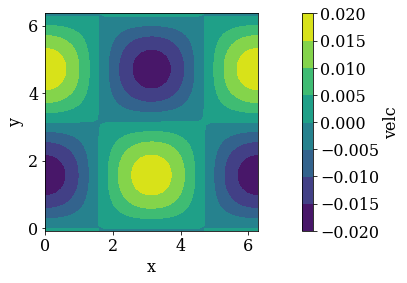

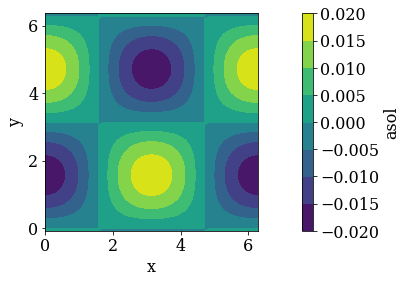

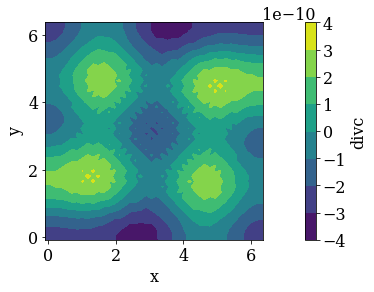

In [7]:
mae6225.io.plot_contour(gridx, 'velc')
mae6225.io.plot_contour(gridx, 'asol')
mae6225.io.plot_contour(gridc, 'divc')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

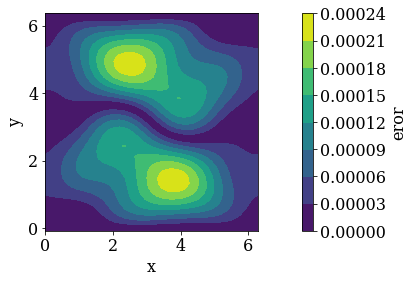

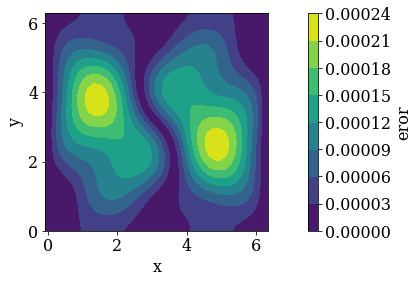

In [9]:
mae6225.io.plot_contour(gridx, 'eror')
mae6225.io.plot_contour(gridy, 'eror')